### 표준 라이브러리의 버전 확인

In [1]:
import sys
print('Python Version :', sys.version)

import numpy as np
print('Numpy Version :', np.__version__)

import pandas as pd
print('Pandas Version :', pd.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib Version :', mpl.__version__)

import scipy as sp
print('Scipy Version :', sp.__version__)

import sklearn
print('Sciket-learn Version :', sklearn.__version__)

Python Version : 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Numpy Version : 1.16.5
Pandas Version : 0.24.2
Matplotlib Version : 3.0.3
Scipy Version : 1.2.1
Sciket-learn Version : 0.20.3


### 1. 데이터 적재와 전처리

In [3]:
from sklearn.datasets import load_iris
# load_iris() 데이터를 불러오면 Bunch 클래스 객체로 읽어온다.
# 파이썬의 dist(딕셔너리) - key:value
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# 실제 데이터를 가지고 있는 target, data 필드
type(iris_dataset['data'])

numpy.ndarray

In [10]:
# 배열의 차원
iris_dataset['data'].shape

(150, 4)

In [11]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
iris_dataset['target'].shape

(150,)

In [13]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 훈련데이터(train data)와 테스트 데이터(test data)로 분리
- train_test_split() 함수를 이용
- 일반적으로는 train 75%(data, target), 나머지는 25% test(data,target)

In [14]:
from sklearn.model_selection import train_test_split
# sklearn에서 일반적으로 데이터는 대문자 X, 레이블은 소문자 y로 표시
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                   iris_dataset['target'],
                                                   random_state=0)

In [15]:
print('X_train 크기 :', X_train.shape)
print('y_train 크기 :', y_train.shape)

X_train 크기 : (112, 4)
y_train 크기 : (112,)


In [16]:
print('X_test 크기 :', X_test.shape)
print('y_test 크기 :', y_test.shape)

X_test 크기 : (38, 4)
y_test 크기 : (38,)


### 2. 데이터의 탐색과 시각화

In [17]:
# X_train 데이터를 사용해서 시각화 하는 작업 => 데이터프레임으로 변환
# iris_dataset['feature_names']
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


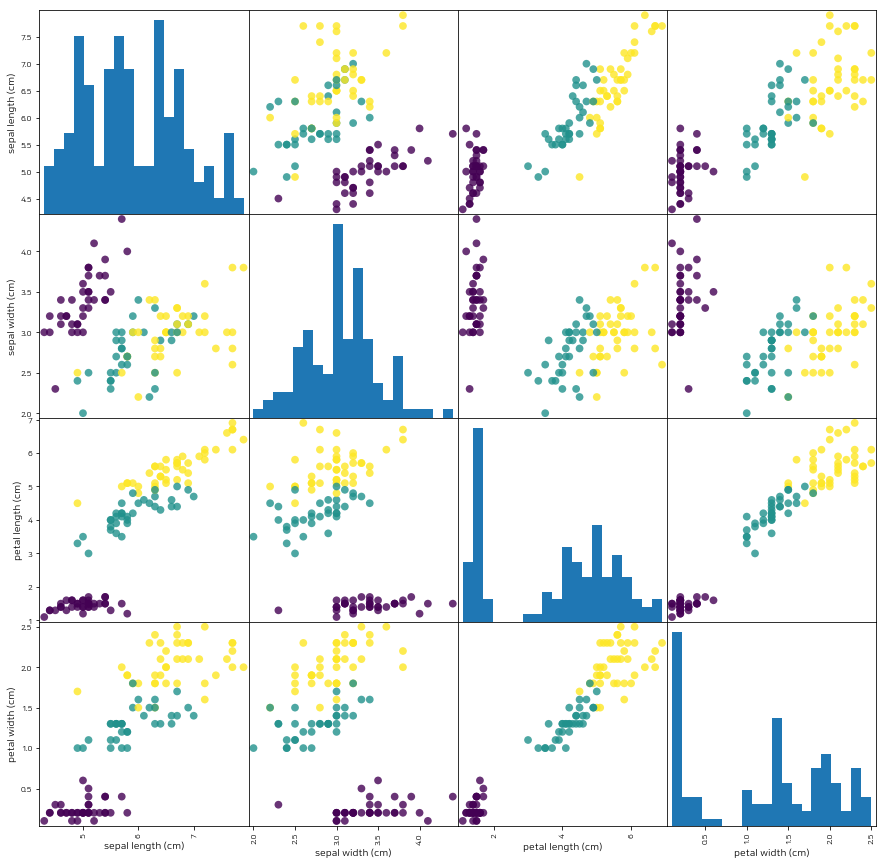

In [19]:
# 산점도 행렬
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins':20},
                           s=60, alpha=0.8)
plt.show()

### 3. 모델링 : k-NN 최근접이웃 알고리즘을 이용한 머신러닝 학습

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
# 학습과 모델링을 생성하는 작업
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

#### 예측하는 작업

In [23]:
# 새로운 데이터 생성
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [24]:
pre = knn.predict(X_new) 
print('예측 :', pre)
print('예측한 타깃 이름 :', iris_dataset['target_names'][pre])

예측 : [0]
예측한 타깃 이름 : ['setosa']


### 모델 평가 작업
- 테스트 데이터를 이용한 예측 작업

In [26]:
y_pred = knn.predict(X_test)
print('테스트 데이터의 예측값\n', y_pred)

테스트 데이터의 예측값
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
print(f'테스트 세트의 정확도 : {np.mean(y_pred == y_test):.2f}')

테스트 세트의 정확도 : 0.97


In [28]:
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.2f}')

테스트 세트의 정확도 : 0.97


##### 요약

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                   iris_dataset['target'],
                                                   random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.2f}')

테스트 세트의 정확도 : 0.97
